# 1. Getting Started

## 1.1 Installing packages

In [1]:
!pip install pillow

In [1]:
!pip install opencv-python

In [2]:
!pip install bing-image-downloader

## 1.3 Importing the required libraries

In [2]:
from bing_image_downloader import downloader 
from matplotlib import pyplot as plt
import tensorflow as tf
import math
import os
import numpy as np
import random

## 1.2 Creating the a folder for the images

In [3]:
original_cwd = os.getcwd()

In [4]:
os.chdir(original_cwd)
try:
  os.mkdir("Downloaded_Images")
except FileExistsError:
  print("The directory has already been created")

The directory has already been created


# 2. Collecting images from the web using bing-image-downloader

In [22]:
os.chdir(original_cwd)
def download_images(querry, directory, limit):
    downloader.download(querry, output_dir=directory, limit=limit)
    
querries = ["jaundice eyes", "eczema eyes", "conjuctivitis eyes"]
out_put_dir = "Downloaded_Images"
limit = 10

if not len(os.listdir(out_put_dir)):
  for querry in querries:
      download_images(querry, out_put_dir, limit)
else:
  print("Images already downloaded")

[%] Downloading Images to C:\Users\user\Desktop\Group_2\dataset\jaundice eyes


[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://www.readersdigest.ca/wp-content/uploads/2019/03/jaundice.jpg
[!] Issue getting: https://www.readersdigest.ca/wp-content/uploads/2019/03/jaundice.jpg
[!] Error:: HTTP Error 403: Forbidden
[%] Downloading Image #1 from https://brownbeautyblog.files.wordpress.com/2014/08/img_09351.jpg
[Error]Invalid image, not saving https://brownbeautyblog.files.wordpress.com/2014/08/img_09351.jpg

[!] Issue getting: https://brownbeautyblog.files.wordpress.com/2014/08/img_09351.jpg
[!] Error:: Invalid image, not saving https://brownbeautyblog.files.wordpress.com/2014/08/img_09351.jpg

[%] Downloading Image #1 from https://www.verywellhealth.com/thmb/QNYESYm9X-Em39f5OyyNakk0Zxg=/2122x1415/filters:no_upscale():max_bytes(150000):strip_icc()/155599928-56a5047b5f9b58b7d0da916a.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http

# 3. Preprocessing

## 3.1 Defining class labels

In [5]:
class_labels = ["conjuctivitis eyes", 
                "eczema eyes", 
                "jaundice eyes"]

## 3.1 Creating a Prefetch dataset using tensorflow, that:
### - assign class labels (Annotation)
### - resizes the images
### - provide a standard color mode

In [6]:
os.chdir(original_cwd)
dataset = tf.keras.utils.image_dataset_from_directory(
    "Downloaded_Images",
    labels='inferred',
    label_mode='int',
    class_names=class_labels,
    image_size=(255, 255),
    color_mode='rgb',
    batch_size=30,
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None
)

Found 30 files belonging to 3 classes.


## 3.2 Visualising the dataset

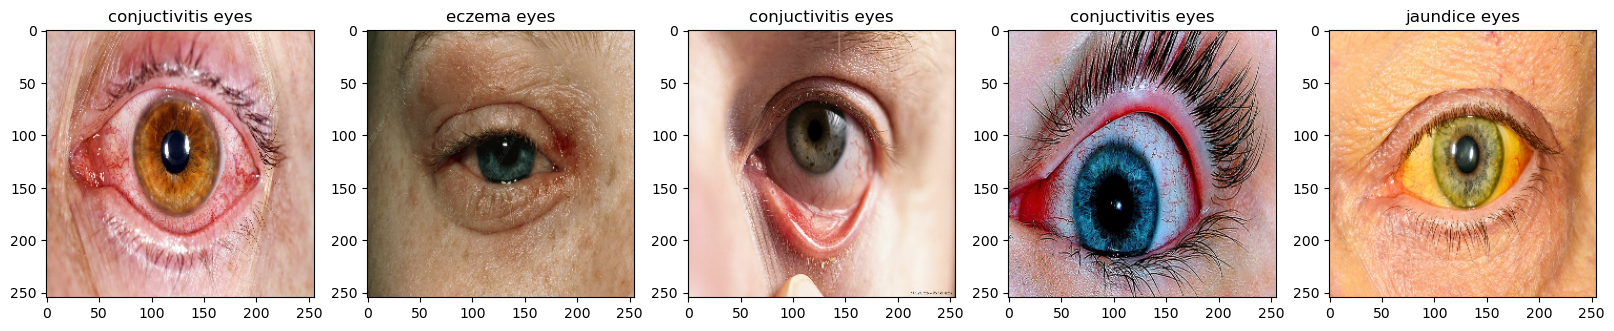

In [7]:
images = list(list(dataset.as_numpy_iterator())[0][0])
labels = list(list(dataset.as_numpy_iterator())[0][1])

images_sample = [[images[3], labels[3]], [images[14], labels[14]], [images[5], labels[5]],
                 [images[6], labels[6]], [images[23], labels[23]]]
fig = plt.subplots(ncols=5, figsize=(20, 20))[1]

for index, (image, label) in enumerate(images_sample):
  fig[index].imshow(image.astype(int))
  fig[index].title.set_text(class_labels[label])

# 4. Applying Feature engineering techniques

## 4.1 Applying one-hot encoding

In [8]:
def one_hot_encode(image, label):
    return image, tf.one_hot(label, depth=3)

dataset_encoded = dataset.map(one_hot_encode)

## 4.2 Applying normalization

In [9]:
def normalize(image, label):
    return tf.cast(image, tf.float32) / 255.0, label
  
dataset_normalized = dataset_encoded.map(normalize)

## 4.3 Visualizing dataset after applying the feature engineering techiniques

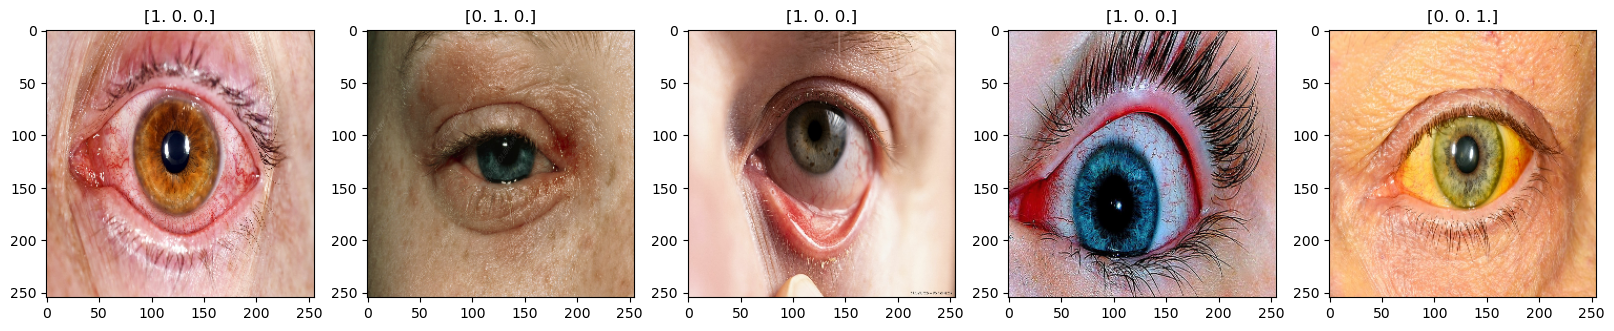

In [10]:
images = list(list(dataset_normalized.as_numpy_iterator())[0][0])
labels = list(list(dataset_normalized.as_numpy_iterator())[0][1])

images_sample = [[images[3], labels[3]], [images[14], labels[14]], [images[5], labels[5]],
                 [images[6], labels[6]], [images[23], labels[23]]]
fig = plt.subplots(ncols=5, figsize=(20, 20))[1]

for index, (image, label) in enumerate(images_sample):
  fig[index].imshow(image)
  fig[index].title.set_text(str(label))

# 6. Creating directories to save the preprocessed images

In [11]:
os.chdir(original_cwd)
try:
  os.mkdir('preprocessed_images')
  
  os.mkdir('preprocessed_images\\conjuctivitis_eyes')
  os.mkdir('preprocessed_images\\conjuctivitis_eyes\\train')
  os.mkdir('preprocessed_images\\conjuctivitis_eyes\\test')
  
  os.mkdir('preprocessed_images\\eczema_eyes')
  os.mkdir('preprocessed_images\\eczema_eyes\\train')
  os.mkdir('preprocessed_images\\eczema_eyes\\test')
  
  os.mkdir('preprocessed_images\\jaundice_eyes')
  os.mkdir('preprocessed_images\\jaundice_eyes\\train')
  os.mkdir('preprocessed_images\\jaundice_eyes\\test')
except FileExistsError:
  print("Directories already created")

Directories already created


## 6.1 Saving the preprocessed images into their perspective class directories

In [12]:
images_list = list(dataset.as_numpy_iterator())[0][0]
labels_list = list(dataset.as_numpy_iterator())[0][1]
test_labels_list = []
test_images_list = []
train_labels_list = []
train_images_list = []

In [13]:
for index, (image, label) in enumerate(zip(images_list, labels_list)):
  if index < 10:
    if index < 7:
      train_labels_list.append(label)
      train_images_list.append(image)
    else:
      test_labels_list.append(label)
      test_images_list.append(image)
  elif index < 20:
    if index < 17:
      train_labels_list.append(label)
      train_images_list.append(image)
    else:
      test_labels_list.append(label)
      test_images_list.append(image)
  else:
    if index < 27:
      train_labels_list.append(label)
      train_images_list.append(image)
    else:
      test_labels_list.append(label)
      test_images_list.append(image)

In [14]:
train_images = np.array(train_images_list)
train_labels = np.array(train_labels_list)

data_list = list(zip(train_images, train_labels))
images = np.array([item[0] for item in data_list])
labels = np.array([item[1] for item in data_list])

tensor_training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
training_dataset = tensor_training_dataset.prefetch(buffer_size=21)

In [15]:
test_images = np.array(train_images)
test_labels = np.array(train_labels)

data_list = list(zip(test_images, test_labels))
images = np.array([item[0] for item in data_list])
labels = np.array([item[1] for item in data_list])

tensor_testing_dataset = tf.data.Dataset.from_tensor_slices((test_images, train_labels))
testing_dataset = tensor_training_dataset.prefetch(buffer_size=21)

In [16]:
os.chdir(original_cwd)
def save_images(image, label, folder_name):
    image_number = len(os.listdir(folder_name)) + 1
    out_put_dir = f"{folder_name}/image_{image_number}.jpg"

    tf.keras.utils.save_img(
        out_put_dir,
        image,
        data_format=None, file_format=None, scale=True
    )

if not len(os.listdir("preprocessed_images/conjuctivitis_eyes/train")) and not len(os.listdir("preprocessed_images/jaundice_eyes/test")):
  for index, (image, label) in enumerate(zip(images_list, labels_list)):
    if index < 10:
      if index < 7:
        save_images(image, label, "preprocessed_images/conjuctivitis_eyes/train")
      else:
        save_images(image, label, "preprocessed_images/conjuctivitis_eyes/test")
    elif index < 20:
      if index < 17:
        save_images(image, label, "preprocessed_images/eczema_eyes/train")
      else:
        save_images(image, label, "preprocessed_images/eczema_eyes/test")
    else:
      if index < 27:
        save_images(image, label, "preprocessed_images/jaundice_eyes/train")
      else:
        save_images(image, label, "preprocessed_images/jaundice_eyes/test")
else:
  print("Images already saved")

Images already saved


In [17]:
# Training Portion of the dataset
training_dataset
# Testing Portion of the dataset
testing_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(255, 255, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>